##1. Vertebral Column Data Set

This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0 and AB=1

In [208]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DSML/vertebral+column/column_2C.dat')

In [209]:
column_names = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
                'sacral_slope', 'pelvic_radius', 'grade of spondylolisthesis',
                'class']
df=pd.read_csv('/content/drive/MyDrive/DSML/vertebral+column/column_2C.dat', delimiter=r"\s+",names=column_names)
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade of spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [210]:
df.loc[df['class']=='AB',['class']]=1
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade of spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


In [211]:
df.loc[df['class']=='NO',['class']]=0
df.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade of spondylolisthesis,class
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0
309,33.84,5.07,36.64,28.77,123.95,-0.20,0


##1(b) Pre-Processing and Exploratory data analysis:

1(b) i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1

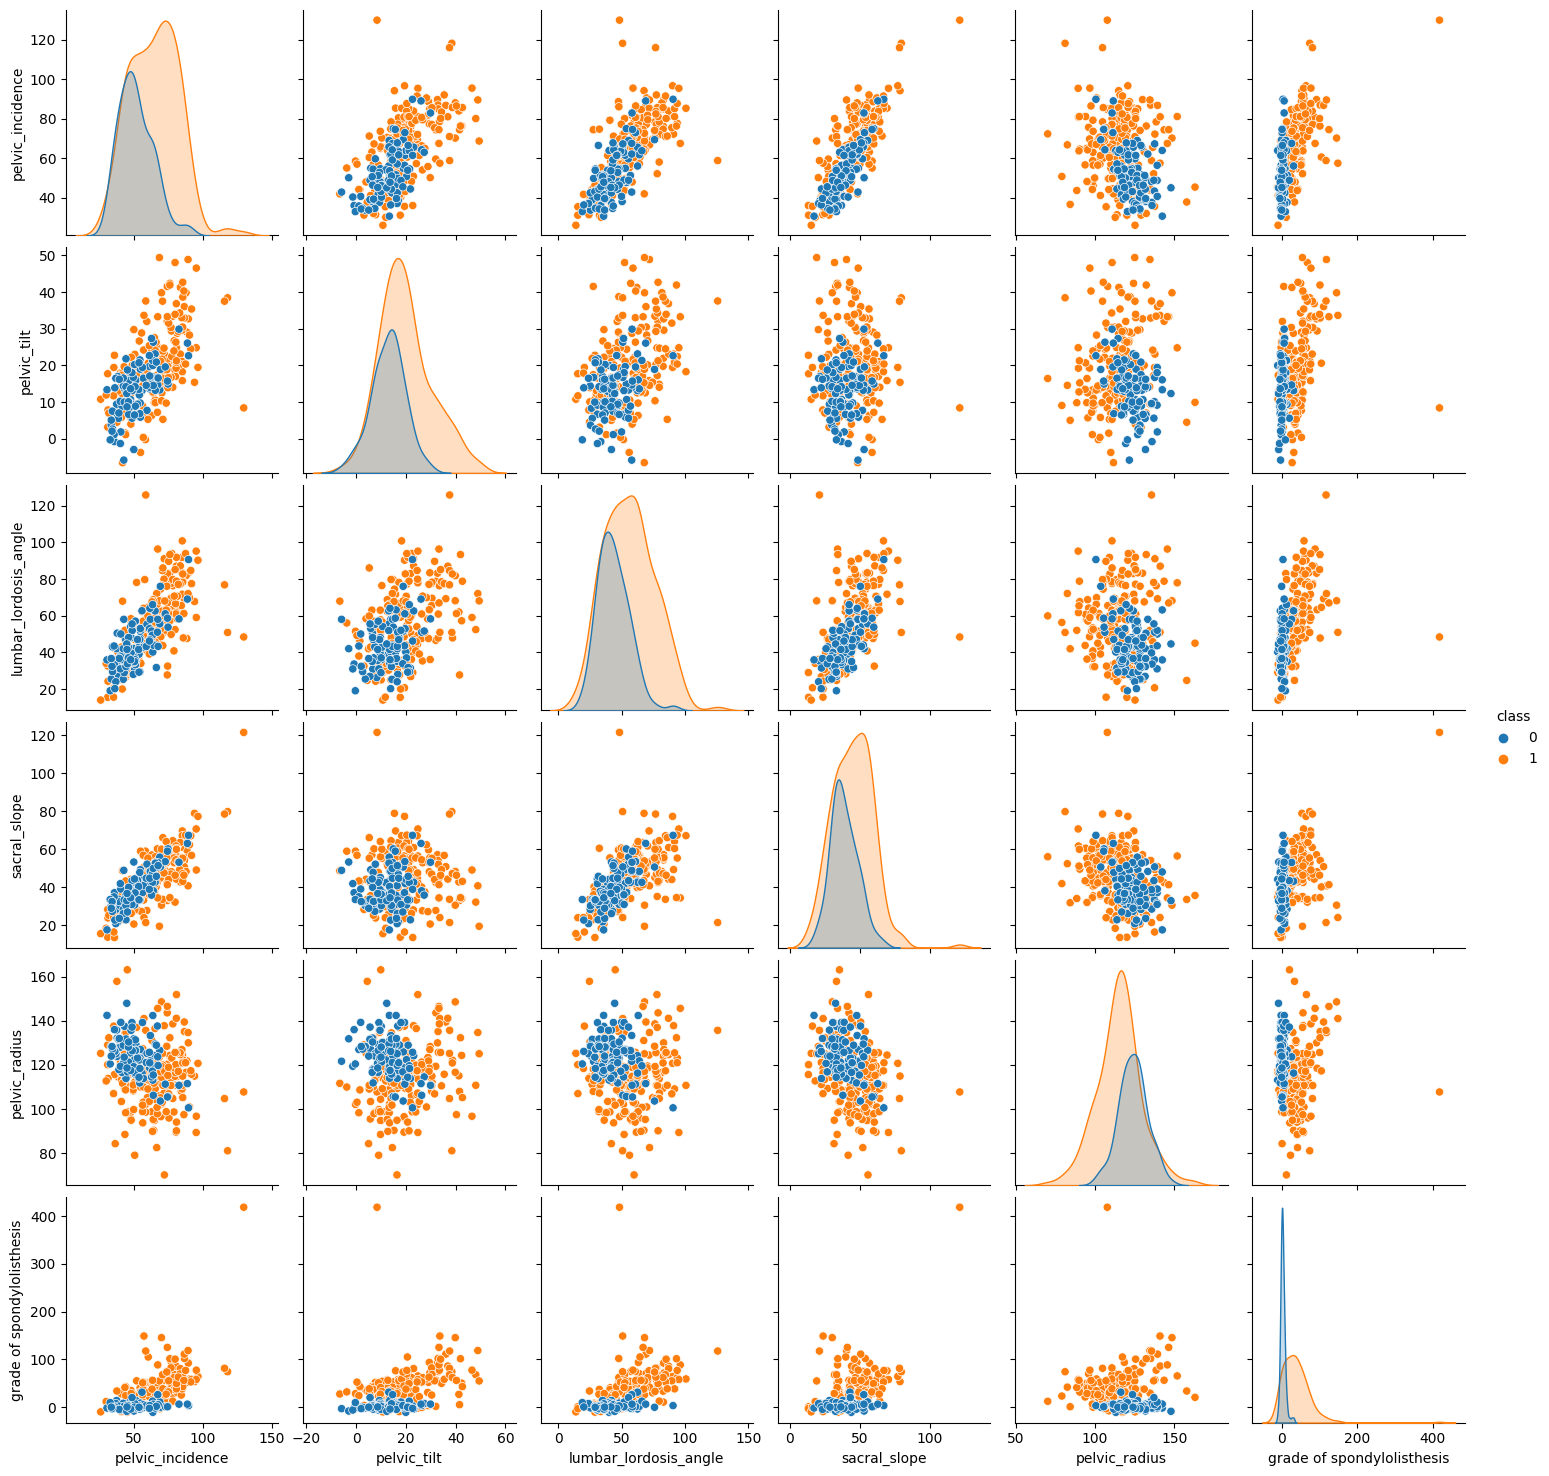

In [181]:
import seaborn as sns
# sns.set_theme()
# sns.pairplot(df,hue='class',markers=["o", "s"])

sns.pairplot(df,hue="class")

# 1(b) ii.
Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1


In [182]:
import matplotlib.pyplot as plt
# ax=df.boxplot(column='pelvic_incidence',by='class',figsize=(8,4))

<Axes: xlabel='class', ylabel='pelvic_incidence'>

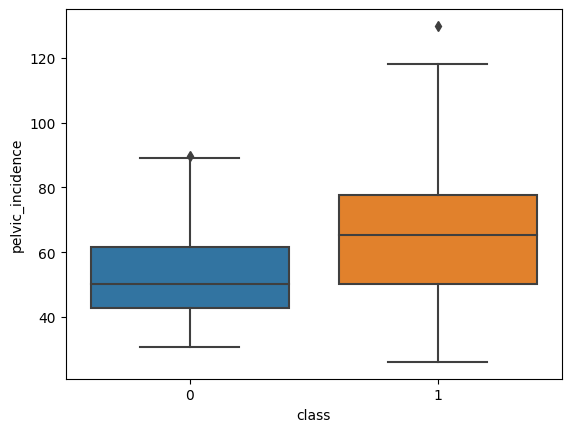

In [183]:
sns.boxplot(data=df, x="class", y="pelvic_incidence")

<Axes: xlabel='class', ylabel='pelvic_tilt'>

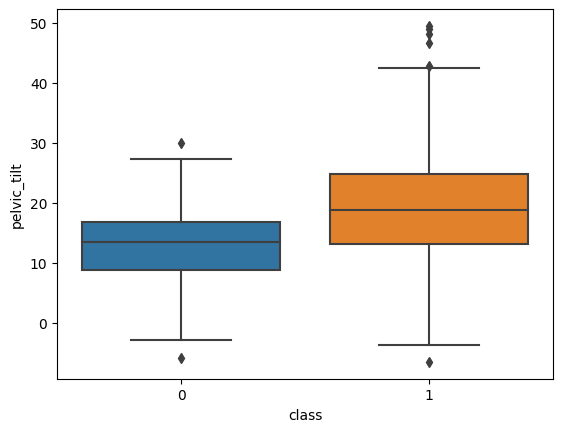

In [184]:
sns.boxplot(data=df, x="class", y="pelvic_tilt")

<Axes: xlabel='class', ylabel='lumbar_lordosis_angle'>

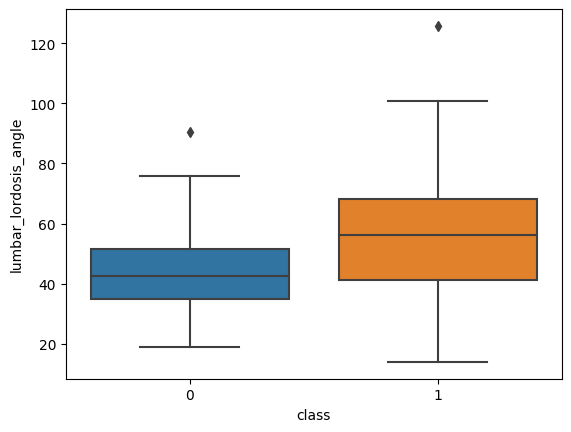

In [185]:
sns.boxplot(data=df, x="class", y="lumbar_lordosis_angle")

<Axes: xlabel='class', ylabel='sacral_slope'>

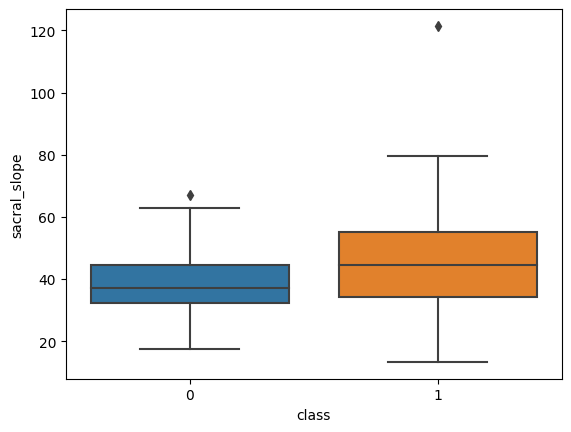

In [186]:
sns.boxplot(data=df, x="class", y="sacral_slope")

<Axes: xlabel='class', ylabel='pelvic_radius'>

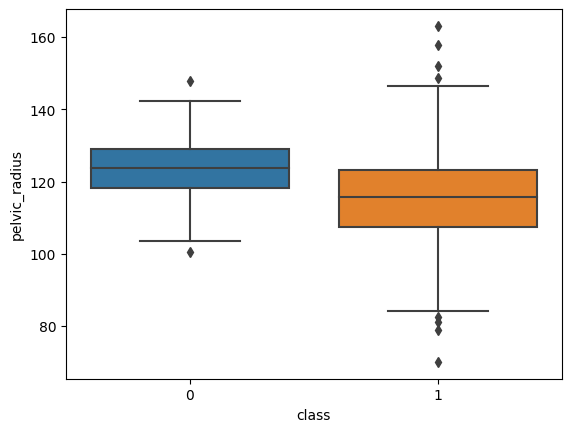

In [187]:
sns.boxplot(data=df, x="class", y="pelvic_radius")

<Axes: xlabel='class', ylabel='grade of spondylolisthesis'>

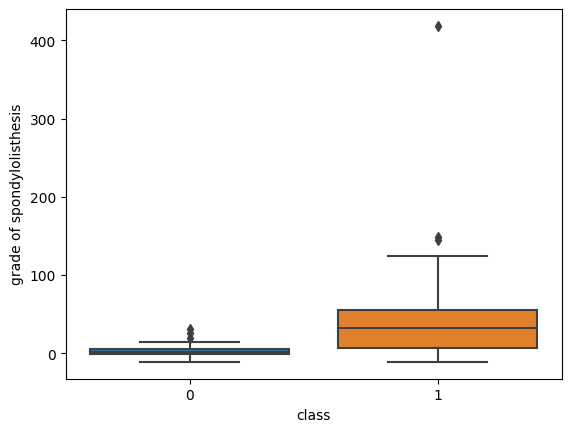

In [188]:
sns.boxplot(data=df, x="class", y="grade of spondylolisthesis")

# 1(b) iii.
Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set

In [189]:
print(len(df))

310


In [190]:
class_0_train=df[df['class']==0].head(70)
class_1_train=df[df['class']==1].head(140)
train_set=pd.concat([class_0_train,class_1_train])
test_set=df.drop(train_set.index)

In [191]:
print(len(train_set))
print(len(test_set))

210
100


In [192]:
X_train = train_set.drop(columns=['class'])
y_train=train_set['class']
y_train=y_train.astype('int')
X_test=test_set.drop(columns=['class'])
y_test=test_set['class']
y_test=y_test.astype('int')

In [193]:
y_train.head()

210    0
211    0
212    0
213    0
214    0
Name: class, dtype: int64

# (c) Classification using KNN on Vertebral Column Data Set

1(c) i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

1(c) ii.Test all the data in the test database with k nearest neighbors. Take decisions by majority polling.
        Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order).
        You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values?
        Calculate the confusion matrix, true positive rate, true negative rate, precision,and F1-score when k = k∗

      
    


------------------


In [194]:
#i) Write code for k-nearest neighbors with Euclidean metric (or use a software package).
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
k = 4
knn_classifier = KNeighborsClassifier(n_neighbors=k)

knn_classifier.fit(X_train, y_train)
y_pred=knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


bestk:
4
bestscore:
0.94
Min Train Error is 0.0


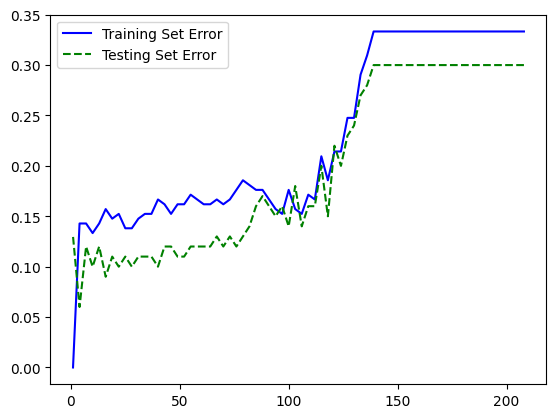

In [213]:
k = 208
best_k = 0
best_score = 0

test_errors=[]
train_errors=[]

while k > 0:
    knn = KNeighborsClassifier(n_neighbors= k,p=2)
    knn.fit(X_train,y_train)

    pred = knn.predict(X_test)
    train_pred = knn.predict(X_train)

    test_error = 1 - accuracy_score(y_test,pred)
    train_error = 1 - accuracy_score(y_train,train_pred)
    test_errors.append(test_error)
    train_errors.append(train_error)

    score=knn.score(X_test,y_test,sample_weight=None)
    if score > best_score:
        best_score = score
        best_k = k
    k = k - 3

print("bestk:")
print(best_k)
print("bestscore:")
print(best_score)
print(f"Min Train Error is {min(train_errors)}")

k1=[]
r1=208
r2=1
while r2<=r1:
    k1.append(r1)
    r1=r1-3

plt.plot(k1,train_errors, color = 'b', label = "Training Set Error" )
plt.plot(k1,test_errors, color = 'g', linestyle = 'dashed', label = "Testing Set Error" )
plt.legend(loc='upper left')
plt.show()

In [195]:
#confusion matrix
actual=y_test
predicted=y_pred
cm = confusion_matrix(actual,predicted)

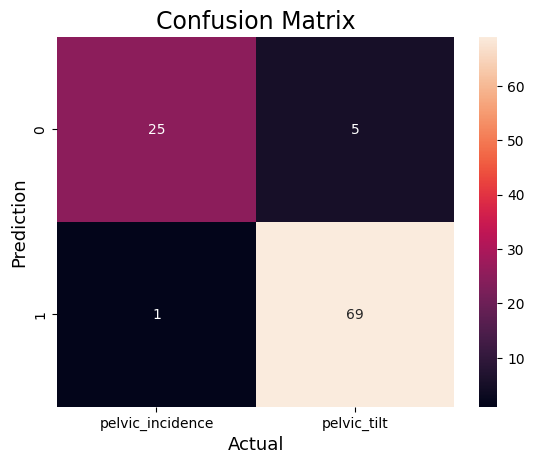

In [196]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['pelvic_incidence','pelvic_tilt'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [197]:
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [198]:
print("Confusion Matrix:")
print(cm)
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1:.2f}")

Confusion Matrix:
[[25  5]
 [ 1 69]]
True Positive Rate (TPR): 0.99
True Negative Rate (TNR): 0.83
Precision: 0.94
F1-Score: 0.94


# 1(c) iii.

Since the computation time depends on the size of the training set, one may only use a subset of the training set.
Plot the best test error rate, 3 which is obtained by some value of k, against the size of training set,
when the size of training set is N ∈ {10, 20, 30, . . . , 210}. 4 Note: for each N, select your training set
by choosing the first bN/3c rows of Class 0 and the first N − bN/3c rows of Class 1 in the training set you
created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5.
For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}.
This plot is called a Learning Curve. Let us further explore some variants of KNN.

In [199]:
from IPython.core import error
error_points=[]
for i in range(10,220,10):

  n=i//3
  class_0_sample=class_0_train.head(n)
  class_1_sample=class_1_train.head(i-n)
  train_set=pd.concat([class_0_sample,class_1_sample])
  # test_set=df.drop(train_set.index)
  X_train = train_set.drop(columns=['class'])
  y_train=train_set['class']
  y_train=y_train.astype('int')
  X_test=test_set.drop(columns=['class'])
  y_test=test_set['class']
  y_test=y_test.astype('int')

  # print(len(class_0_sample+class_1_sample))
  k=1
  best_error=float('inf')
  print(i)
  while(k<i):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred=knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    error=1-accuracy
    if error<best_error:
      best_error=error
    # print(k,end=" ")
    k+=5
  print(k, best_error)
  error_points.append(best_error)
  # print()


10
11 0.25
20
21 0.19999999999999996
30
31 0.21999999999999997
40
41 0.25
50
51 0.30000000000000004
60
61 0.29000000000000004
70
71 0.29000000000000004
80
81 0.29000000000000004
90
91 0.29000000000000004
100
101 0.25
110
111 0.21999999999999997
120
121 0.17000000000000004
130
131 0.16000000000000003
140
141 0.15000000000000002
150
151 0.13
160
161 0.13
170
171 0.13
180
181 0.09999999999999998
190
191 0.08999999999999997
200
201 0.08999999999999997
210
211 0.07999999999999996


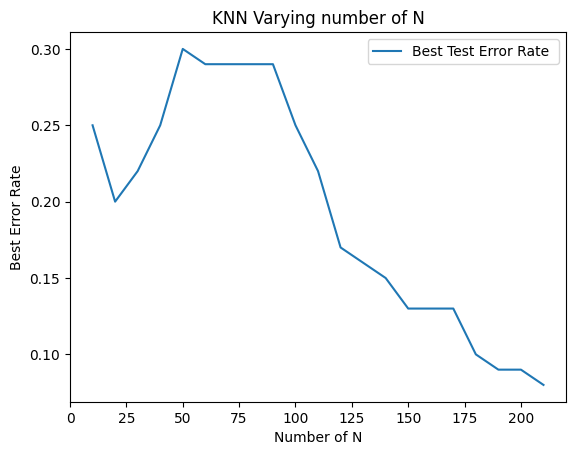

In [200]:
import matplotlib.pyplot as plt
import numpy as np

neighbors=np.arange(0,21)
# Define the x-axis values from 10 to 210 with a step size of 10
plt.plot(neighbors * 10 + 10, error_points, label='Best Test Error Rate ')
plt.title('KNN Varying number of N')
# plt.plot(neighbors * 10 + 10, best_error_rate, label='Best Test Error Rate ')
plt.legend()
plt.xlabel('Number of N')
plt.ylabel('Best Error Rate')
plt.show()


# 1(d) i A

Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors
(i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.

i. Minkowski Distance:

A. which becomes Manhattan Distance with p = 1.

Best K :
6
Minimun Test Error:
0.11
Minimum Train Error:
0.0


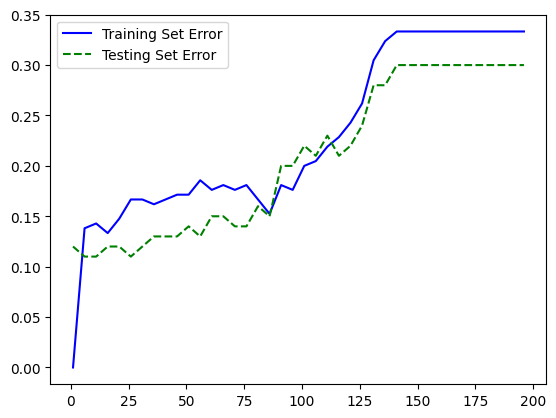

In [201]:
# 1(d) i A
# i. Manhattan Distance:
#A. which becomes Manhattan Distance with p = 1.
k_di=[]
res=[]

test_errors_di_a=[]
train_errors_di_a=[]

for k in range(1,197,5):


    k_di.append(k)

    knn_di_a = KNeighborsClassifier(n_neighbors = k, p=1, metric='manhattan')
    knn_di_a.fit(X_train,y_train)

    vc_y_pred_di_a = knn_di_a.predict(X_test)
    vc_y_train_pred_di_a = knn_di_a.predict(X_train)

    test_error_d = 1 - accuracy_score(y_test,vc_y_pred_di_a)
    train_error_d = 1 - accuracy_score(y_train,vc_y_train_pred_di_a)
    test_errors_di_a.append(test_error_d)
    train_errors_di_a.append(train_error_d)


minimum_test_error_di_a = min(test_errors_di_a)
minimum_train_error_di_a = min(train_errors_di_a)

best_k_di = k_di[np.argmin(test_errors_di_a)]


print('Best K :')
print(best_k_di)
print('Minimun Test Error:')
print('%.2f' % minimum_test_error_di_a)
print('Minimum Train Error:')
print(minimum_train_error_di_a)

plt.plot(k_di,train_errors_di_a, color = 'b', label = "Training Set Error" )
plt.plot(k_di,test_errors_di_a, color = 'g', linestyle = 'dashed', label = "Testing Set Error" )
plt.legend(loc='upper left')
plt.show()




# 1(d) i B

(d) Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors
        (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.

i. Minkowski Distance:
            
B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗ you found for the Manhattan
   distance in 1(d)iA. What is the best log10(p)?

In [214]:
# 1(d) i B

k_d=6

train_errors_d_p=[]
test_errors_d_p=[]
p_log=[]


for p_var in [10**(0.1*i) for i in range(1,11)]:
    p_log.append(p_var)
    knn_log = KNeighborsClassifier(n_neighbors = 6, p = p_var, metric='minkowski')
    knn_log.fit(X_train,y_train)

    vc_y_pred_log = knn_log.predict(X_test)
    vc_y_train_pred_log = knn_log.predict(X_train)

    test_error_d_log = 1 - accuracy_score(y_test,vc_y_pred_log)
    train_error_d_log = 1 - accuracy_score(y_train,vc_y_train_pred_log)
    train_errors_d_p.append(train_error_d_log)
    test_errors_d_p.append(test_error_d_log)


minimum_test_error_di_b = min(test_errors_d_p)
minimum_train_error_di_b = min(train_errors_d_p)

print('For optimal p = {:.2f} [where k = {}]'.format(p_log[np.argmin(test_errors_d_p)],k_d))
print('Best log10(p) = {:.2f}'.format(np.log10(p_log[np.argmin(test_errors_d_p)])))
print('Minimun Test Error:')
print('%.2f' % minimum_test_error_di_b)
print('Minimum Train Error:')
print('%.2f' % minimum_train_error_di_b)

For optimal p = 3.98 [where k = 6]
Best log10(p) = 0.60
Minimun Test Error:
0.06
Minimum Train Error:
0.13


# 1(d) i C

(d) Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors
    (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.
    
i. Minkowski Distance:

C. which becomes Chebyshev Distance with p → ∞

In [203]:
# 1(d) i C

k_inf = 1
bestscoredC = 0
bestkdC_inf = 1
i = 0

while k_inf <= 196:
    knn_inf = KNeighborsClassifier(n_neighbors= k_inf, metric = 'chebyshev', p=float('inf'))
    knn_inf.fit(X_train,y_train)

    test_y_predict = knn_inf.predict(X_test)
    score_inf=knn_inf.score(X_test,y_test,sample_weight=None)

    if score_inf > bestscoredC:

        bestscoredC = score_inf
        bestkdC_inf = k_inf

    i = i + 1
    k_inf = k_inf + 5


test_error_inf=(1-bestscoredC)


print("best_k_dC:")
print(bestkdC_inf)

print("best_score_dC:")
print(bestscoredC)

best_k_dC:
16
best_score_dC:
0.92


# 1(d) ii

(d) Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors
    (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.

ii. Mahalanobis Distance.

In [204]:
# 1(d) ii

k_mah = 1
bestscore_d_mah = 0
bestk_mah = 1
i = 0

while k_mah <= 196:
    knn_mah = KNeighborsClassifier(n_neighbors= k_mah, metric = 'mahalanobis',metric_params={'VI':np.linalg.inv(np.cov(X_train,rowvar=False))})



    knn_mah.fit(X_train, y_train)

    test_y_predict_mah = knn_mah.predict(X_test)
    score_mah=knn_mah.score(X_test,y_test,sample_weight=None)

    if score_mah > bestscore_d_mah:
        bestscore_d_mah = score_mah
        bestk_mah = k_mah

    i = i + 1
    k_mah = k_mah + 5


test_error_mah=(1-bestscore_d_mah)

print("bestscore_d_2:")
print(bestscore_d_mah)
print("bestk_d_2:")
print(bestk_mah)


bestscore_d_2:
0.83
bestk_d_2:
1


# 1 (d)
Summarizing Test Errors in Table

In [205]:
table_d = {'Distance_Name':['Manhattan','minkowski','Chebyshev','Mahalanobis'],'BestK':[best_k_di,k_d,bestkdC_inf,bestk_mah],'TestErrors':[minimum_test_error_di_a,minimum_test_error_di_b,test_error_mah,test_error_mah]}
res_table_d = pd.DataFrame(table_d)
res_table_d

,Distance_Name,BestK,TestErrors
0,Manhattan,6,0.110000
1,minkowski,6,0.133333
2,Chebyshev,16,0.170000
3,Mahalanobis,1,0.170000


# 1(e)

(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point
in voting is inversely proportional to its distance from the query/test data point. In this case,
closer neighbors of a query point will have a greater influence than neighbors which are further away.
Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test
errors when k ∈ {1, 6, 11, 16, . . . , 196}.

In [206]:
a=[]
b=[]
c=[]
array=['manhattan','euclidean','chebyshev']
for i in array:
    k_e_c = 1
    bestscore_e_c = 0
    bestk_e_c = 1

    while k_e_c <= 196:
        knn_e_c = KNeighborsClassifier(n_neighbors= k_e_c, metric = i, p=float('inf'), weights = 'distance')
        knn_e_c.fit(X_train,y_train)

        test_y_predict_e_c = knn_e_c.predict(X_test)
        score_e_c=knn_e_c.score(X_test,y_test,sample_weight=None)

        if score_e_c > bestscore_e_c:
            bestscore_e_c = score_e_c
            bestk_e_c = k_e_c
        k_e_c = k_e_c + 5



    test_err_e_c=(1-bestscore_e_c)
    print(bestk_e_c,bestscore_e_c)
    a.append(bestk_e_c)
    c.append(bestscore_e_c)
    b.append(test_err_e_c)

26 0.9
6 0.9
16 0.89


# 1 (e)
Summarizing Test Errors in Table

In [207]:
table={'Distance_Name':array,'BestK':a,'TestErrors':b,'Best accuracies':c}
res_table_e = pd.DataFrame(table)
res_table_e

,Distance_Name,BestK,TestErrors,Best accuracies
0,manhattan,26,0.10,0.90
1,euclidean,6,0.10,0.90
2,chebyshev,16,0.11,0.89


(f) What is the lowest training error rate you achieved in this homework?

Ans: The lowest train error is 0.00 when k=4 with Euclidian Metric and k=6 with Manhattan metric